In [359]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [360]:
cig = pd.read_csv('/Users/keeganballantyne/Downloads/Cigarette.csv')
cen = pd.read_csv('/Users/keeganballantyne/Downloads/census.csv')

In [361]:
cig.head()
cig = cig.drop('Unnamed: 0', axis='columns')
#Columns I should need
#State, year, population, tax, taxs, avgprs, income, packpc, CPI

In [362]:
cig_melted = cig.melt(id_vars = ['state'])
cig_melted.head(10)

,state,variable,value
0,Alabama,y1985,1985.0
1,Arkansas,y1985,NaN
2,Arizona,y1985,NaN
3,California,y1985,NaN
4,Colorado,y1985,NaN
5,Connecticut,y1985,NaN
6,Delaware,y1985,NaN
7,Florida,y1985,NaN
8,Georgia,y1985,NaN
9,Iowa,y1985,NaN


In [363]:
# creating a new year column and separating the year out from the 'variables'

values = cig_melted['variable']
year = []
for i in values:
    year = np.append(year, int(i[-4:]))

len(year) == cig_melted.count()

state        True
variable     True
value       False
dtype: bool

In [364]:
cig_melted['year'] = year
cig_melted

,state,variable,value,year
0,Alabama,y1985,1985.000000,1985.0
1,Arkansas,y1985,NaN,1985.0
2,Arizona,y1985,NaN,1985.0
3,California,y1985,NaN,1985.0
4,Colorado,y1985,NaN,1985.0
...,...,...,...,...
4219,Vermont,taxs1995,52.363750,1995.0
4220,Washington,taxs1995,96.142670,1995.0
4221,Wisconsin,taxs1995,71.589584,1995.0
4222,West Virginia,taxs1995,50.425499,1995.0


In [365]:
rename = cig_melted['variable']
new_name = ([])

for i in rename:
    new_name = np.append(new_name, i[:-4])

In [366]:
new_name

array(['y', 'y', 'y', ..., 'taxs', 'taxs', 'taxs'], dtype='<U32')

In [367]:
cig_melted['variable'] = new_name

In [368]:
cig_melted.head()

,state,variable,value,year
0,Alabama,y,1985.0,1985.0
1,Arkansas,y,NaN,1985.0
2,Arizona,y,NaN,1985.0
3,California,y,NaN,1985.0
4,Colorado,y,NaN,1985.0


In [369]:
cig_melted = cig_melted.pivot(index = ['state', 'year'], columns = 'variable', values = 'value').reset_index()

In [370]:
cig_melted = cig_melted.drop(labels = 'y', axis = 'columns')

In [371]:
cig_melted

variable,state,year,CPI,avgprs,income,packpc,pop,tax,taxs
0,Alabama,1985.0,1.076,102.181671,46014968.0,116.486282,3973000.0,32.500004,33.348335
1,Alabama,1986.0,1.096,107.989166,48703940.0,117.159317,3992000.0,32.500004,33.405838
2,Alabama,1987.0,1.136,113.527328,51846312.0,115.836655,4016000.0,32.500004,33.460670
3,Alabama,1988.0,1.183,120.033424,55698852.0,115.258446,4024000.0,32.500004,33.525085
4,Alabama,1989.0,1.240,133.256012,60044480.0,109.205956,4030000.0,32.500004,33.656002
...,...,...,...,...,...,...,...,...,...
523,Wyoming,1991.0,1.362,143.058334,8636382.0,106.829437,457739.0,30.000000,30.000000
524,Wyoming,1992.0,1.403,161.983337,9061238.0,107.445450,463491.0,32.000000,32.000000
525,Wyoming,1993.0,1.445,155.191650,9515136.0,103.830650,469033.0,34.000000,34.000000
526,Wyoming,1994.0,1.482,150.666656,9954215.0,105.898750,474982.0,36.000000,36.000000


/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_33120/108743822.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cig_line.set_yticklabels(cig_line.get_yticks(), size = 15)
/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_33120/108743822.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cig_line.set_xticklabels(cig_line.get_xticks(), size = 20) #how to get rid of '1998.0?'


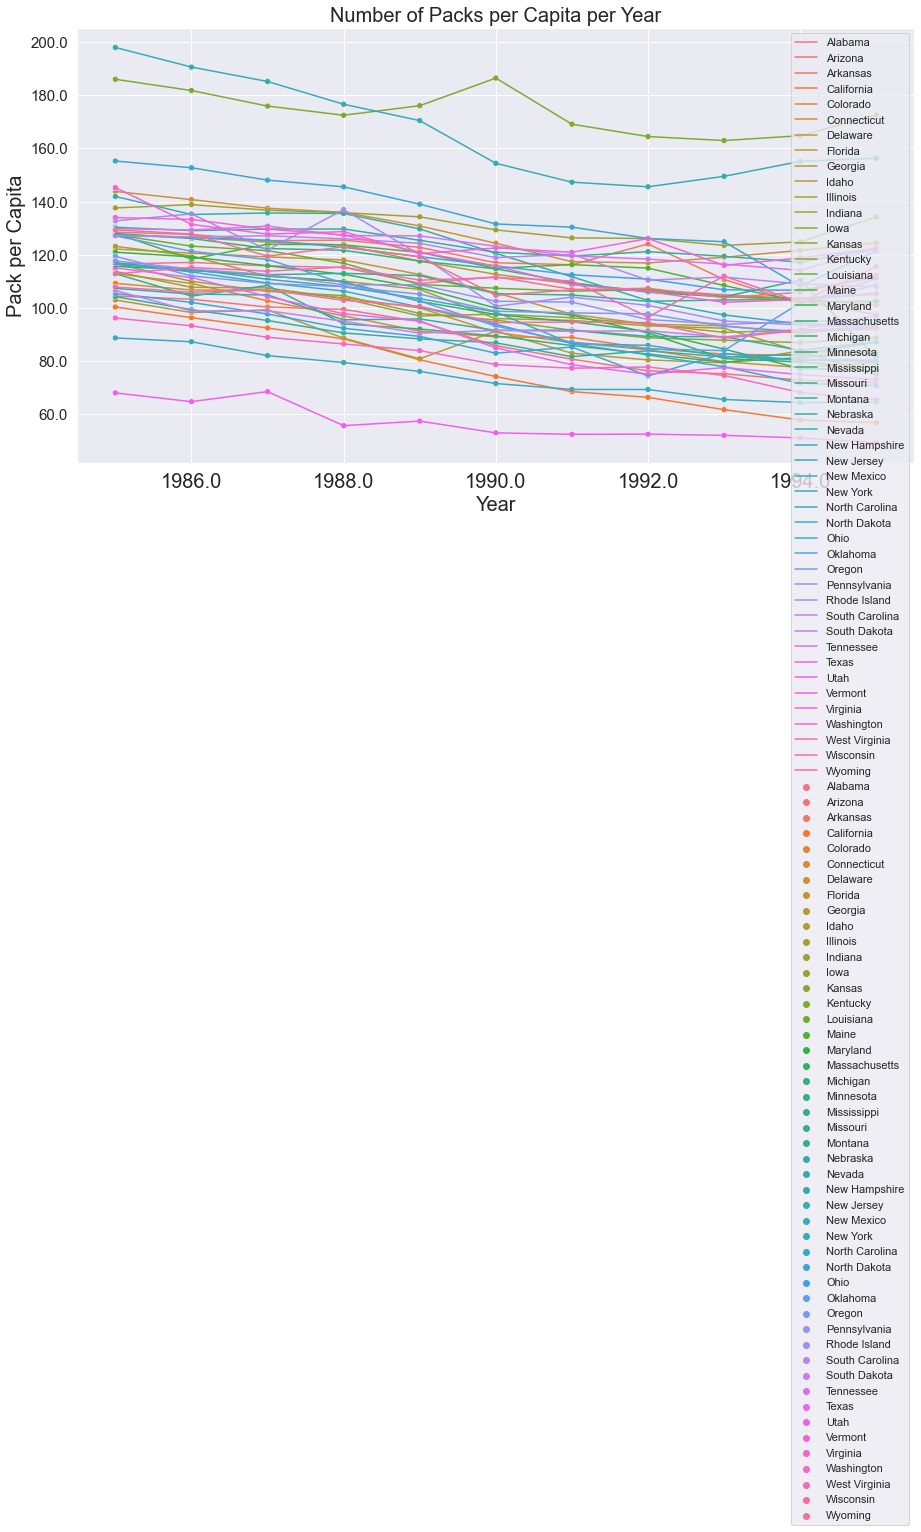

In [374]:
sns.set(rc = {'figure.figsize':(15,8)})
cig_scatter = sns.scatterplot(x = cig_melted['year'], y = cig_melted['packpc'], hue = cig_melted['state'])
cig_line  = sns.lineplot(x = cig_melted['year'], y = cig_melted['packpc'], hue = cig_melted['state'],
                        markers=["o"]*2, dashes=[""]*2)
cig_line.set_yticklabels(cig_line.get_yticks(), size = 15)
cig_line.set_xticklabels(cig_line.get_xticks(), size = 20) #how to get rid of '1998.0?'
plt.title("Number of Packs per Capita per Year", size = 20)
plt.xlabel("Year", size=20)
plt.ylabel("Pack per Capita", size=20)
plt.legend(loc='upper right')


### Question 1b:
Looking at the largest amounts of packs sold per capita, New Hampshire and Kentucky both are featured in the top 10 highest amount of sales per capita across all years. There is an overall trend of the sales of pack per capita decreasing from 1985 to about 1994 but in 1995 the sales of a pack per capita increased during that time. Perhaps the Afghanistan war which was happening during that time was starting to get serious and people turned to smoking to help cope with the tragedies that came from it.

In [405]:
cig_melted.nlargest(10, 'packpc')

variable,state,year,CPI,avgprs,income,packpc,pop,tax,taxs
286,New Hampshire,1985.0,1.076,95.500000,15767469.0,197.993988,997000.0,33.0,33.000000
287,New Hampshire,1986.0,1.096,101.166664,17399088.0,190.634140,1025000.0,33.0,33.000000
159,Kentucky,1990.0,1.307,124.381256,57175332.0,186.481873,3692584.0,19.0,24.922916
154,Kentucky,1985.0,1.076,87.001251,42703144.0,186.035187,3695000.0,19.0,23.142918
288,New Hampshire,1987.0,1.136,108.708336,19368684.0,185.199234,1054000.0,33.0,33.000000
155,Kentucky,1986.0,1.096,92.793747,44233712.0,181.805847,3688000.0,19.0,23.418751
289,New Hampshire,1988.0,1.183,120.733337,21390430.0,176.638962,1083000.0,33.0,33.000000
158,Kentucky,1989.0,1.240,116.217499,53695508.0,176.094650,3677000.0,19.0,24.534166
156,Kentucky,1987.0,1.136,97.413750,47080768.0,175.950058,3684000.0,19.0,23.638750
164,Kentucky,1995.0,1.524,145.979675,74079712.0,172.647781,3855248.0,27.0,35.263000


### Question 1c:
The two states with the highest cigarette sales were Michigan and Washington in 1995, and the states with the lowest cigarette sales were North Carolina and Kentucky. Perhaps the tobacco industry has not had a strong marketing presence in North Carolina and Kentucky compared to Washington and Michigan. However, overall I do not think there's any direct reason as to why these states are the highest and lowest 

In [396]:
state_high = cig_melted.nlargest(2, 'avgprs')
state_high

variable,state,year,CPI,avgprs,income,packpc,pop,tax,taxs
219,Michigan,1995.0,1.524,240.849670,231594240.0,81.388252,9659871.0,99.0,112.633003
494,Washington,1995.0,1.524,239.109344,129680832.0,65.530922,5431024.0,80.5,96.142670


In [403]:
state_low = cig_melted.nsmallest(2, 'avgprs')
state_low

variable,state,year,CPI,avgprs,income,packpc,pop,tax,taxs
330,North Carolina,1985.0,1.076,84.967995,79104656.0,155.283768,6255000.0,18.0,21.268000
154,Kentucky,1985.0,1.076,87.001251,42703144.0,186.035187,3695000.0,19.0,23.142918


### Question 1d:
In my opinion I would think that Edward Tufte would say that this time series plot would be good for innovation on the account of raising awareness of where people in the U.S. are smoking the most and the least geographically. Despite a national effort to curb smoking all around, organizations like the truth anti-smoking campaign could use this data to increase their targeting campaign in certain states within the U.S. But I would also argue that given the time that this data was collected from, I feel like Edward Tufte would also make an argument that this linegraph is not innovative. The reason why this may not be considered innovative is because of the rise of vaping within the current times. Data on vaping overall has been very underreported and is marketed in bad faith to younger generations of people. Perhaps a better way of tracking data is to broadly consider "nicotine" intake instead of just smoking or vaping. Both smoking and vaping cause users to inhale addictive amounts of nicotine which appears to be the root cause of smoking and vaping addictions respectively. With the conversation more broadly on nicotine addiction, this may circumvent underreporting due to researchers focusing too much on the specifics of how people are ingesting nicotine (i.e. smoking or vaping)

### Question 2:
#### The U.S. Population and Aging:

One of the biggest concerns in the U.S. healthcare system and within population demographics is the rapid rise in aging Americans. According to researchers at the Stern Center for Evidence-Based Policy at the University of Pittsbugh, adults over the age of 65 will make up about 1 in 5 Americans by 2050. This raises major alarms for the healthcare system, the economy, the availability of healthcare workers, and many other concerns for the care of older people within the American population.

One of the biggest concerns for the aging population is the capacity to adequately care for them. Elder abuse has also been noted as a serious problem according to the CDC with reports that "men had higher rates of both nonfatal assaults and homicides. The rate for nonfatal assaults increased more than 75% among men (2002–2016)." With the rapid increase of the elderly population in America compared to other age groups, it can be inferred that this increase has roots in the Baby Boom, rapidly improving technology and medicine, and the overall quality of life improving for everyone. However, what policymakers, legislators, and healthcare workers fail to recognize is the outpacing of the elderly population compared to rest of the age groups. My aim and question is to quantify and bring awareness to the rapid increase of elderly men within the U.S.

#### Citations:
https://www.cdc.gov/violenceprevention/elderabuse/fastfact.html

https://www.healthpolicyinstitute.pitt.edu/sites/default/files/SternCtrAddressingNeeds.pdf
   
#### Question:
How much did the population of American aged 65 and over increase between 1900 and 2000?

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

In [ ]:
c1900 = cen[cen["Year"] == 1900]
c1900_65up = c1900[c1900["Age"] >= 65]
c1900_young = c1900[c1900["Age"] < 65]

c2000 = cen[cen["Year"] == 2000]
c2000_65up = c2000[c2000["Age"] >= 65]
c2000_young = c2000[c2000["Age"] < 65]
# just do male population

In [263]:
c2000_65up["People"]

27    4453623
29    3792145
31    2912655
33    1902638
35     970357
37     336303
65    4804784
67    5184855
69    4355644
71    3221898
73    1981156
75    1064581
Name: People, dtype: int64

In [310]:
cohortlabels = []
for i in range(0,19):
    cohortlabels.append("{:d}-{:d}".format(i*5, i*5+4))
cohortlabels

cohortlabels = ["{:d}-{:d}".format(i*5, i*5+4) for i in range(0,19)]
cohortlabels=cohortlabels[0:19]
cohortlabels[-1]="90+"
cohortlabels

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90+']

In [293]:
age_new_y = cohortlabels[0:13]

In [294]:
age_new_y

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64']

In [295]:
age_new = cohortlabels[13:19]

In [315]:
age_new

['65-69', '70-74', '75-79', '80-84', '85-89', '90+']

In [331]:
c2000_65up.reset_index()
c1900_65up.reset_index()

,index,Sex,Year,Age,People
0,26,1,1900,65,672663
1,28,1,1900,70,454747
2,30,1,1900,75,268211
3,32,1,1900,80,127435
4,34,1,1900,85,44008
5,36,1,1900,90,15164
6,64,2,1900,65,640212
7,66,2,1900,70,440007
8,68,2,1900,75,265879
9,70,2,1900,80,132449


In [332]:
c1900_young.reset_index()
c2000_young.reset_index()

,index,Sex,Year,Age,People
0,1,1,2000,0,9735380
1,3,1,2000,5,10552146
2,5,1,2000,10,10563233
3,7,1,2000,15,10237419
4,9,1,2000,20,9731315
5,11,1,2000,25,9659493
6,13,1,2000,30,10205879
7,15,1,2000,35,11475182
8,17,1,2000,40,11320252
9,19,1,2000,45,9925006


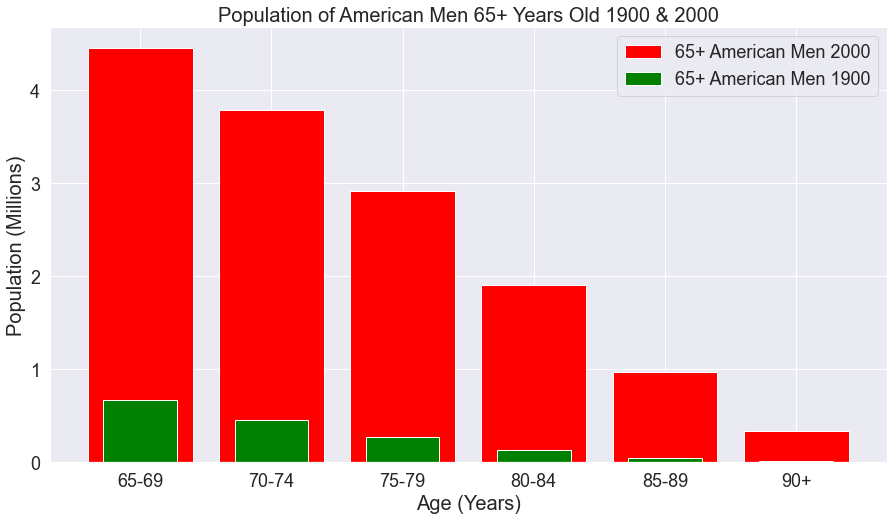

In [352]:
width = 0.8

plt.bar(cohortlabels[13:19], c2000_65up["People"][0:6]/1000000, width=width, color='red',
       label='65+ American Men 2000')
plt.bar(cohortlabels[13:19], c1900_65up["People"][0:6]/1000000, width=0.7*width, 
        color='green', label='65+ American Men 1900')
plt.ylabel("Population (Millions)", fontsize=20)
plt.xlabel("Age (Years)", fontsize=20)
plt.title("Population of American Men 65+ Years Old 1900 & 2000", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

plt.show()

#### Figure 1:

This figure represents a bar graph of the population of American men aged 65+ in the U.S. Census in 1900 and 2000. A dramatic increase in the number of men aged 65+ occurred across each age group from 65-90+ by at least 1 million. Overall, the population of American men 65+ increased by more than 12 million, or 900%, between 1900 and 2000.

In [356]:
total=c2000_65up["People"][0:6].sum()-c1900_65up["People"][0:6].sum()
percent=(c2000_65up["People"][0:6].sum()/c1900_65up["People"][0:6].sum())*100
print(total) #Total growth among Americans 65+ years old
print(percent) #Percentage of growth among Amercans 65+ years old

12785493
908.0689382314054


In [355]:
a = 6
age_inc=[]
for i in range(a):
    percen=age_inc.append(((c2000_65up.iloc[i,3]+c2000_65up.iloc[i+6,3])
                           /(c1900_65up.iloc[i,3]+c1900_65up.iloc[i+6,3]))*100)

# Percentage increase of each age group in order
age_inc

[705.2009521089212,
 1003.2925250962835,
 1360.8753206388437,
 1971.8551353680873,
 3186.6219688626893,
 3973.3499730549956]

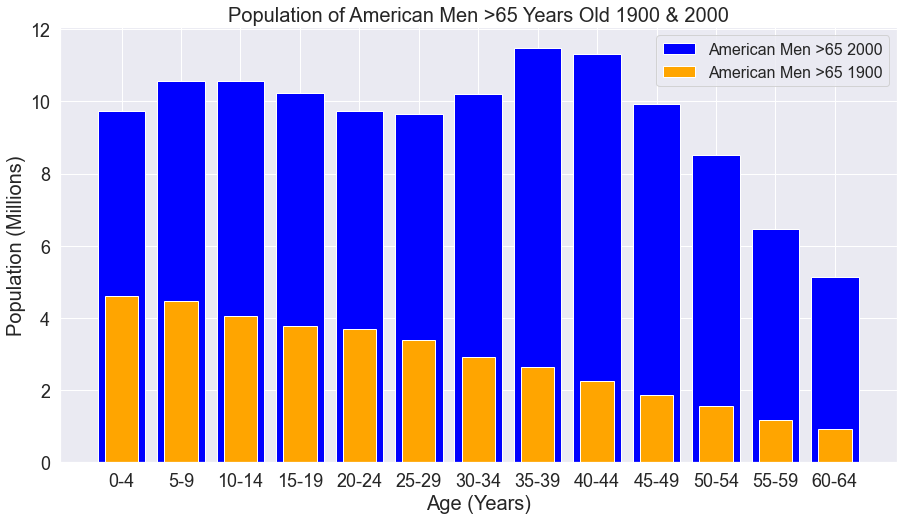

In [354]:
width = 0.8

plt.bar(cohortlabels[0:13], c2000_young["People"][0:13]/1000000, width=width, color='blue',
       label='American Men >65 2000')
plt.bar(cohortlabels[0:13], c1900_young["People"][0:13]/1000000, width=0.7*width, 
        color='orange', label='American Men >65 1900')
plt.ylabel("Population (Millions)", fontsize=20)
plt.xlabel("Age (Years)", fontsize=20)
plt.title("Population of American Men >65 Years Old 1900 & 2000", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=16)

plt.show()

#### Figure 2:

This figure represents a bar graph of the population of American men aged >65 in the U.S. Census in 1900 and 2000. Even though there was also a dramatic increase in the population of men <65 years old, the overall percentage increase was not as nearly as much as the older population. This percentage increase was only 330% which is almost one-third of the percentage increase in American men aged 65+. 

In [357]:
total_y=c2000_young["People"][0:13].sum()-c1900_young["People"][0:13].sum()
percent_y=(c2000_young["People"][0:13].sum()/c1900_young["People"][0:13].sum())*100
print(total_y) #Total growth among Amercans <65 years old
print(percent_y) #Percentage of growth among Amercans <65 years old

86162713
330.7949986455685


In [358]:
b = 13
age_inc_y=[]
for i in range(b):
    percen=age_inc_y.append(((c2000_young.iloc[i,3]+c2000_young.iloc[i+13,3])
                           /(c1900_young.iloc[i,3]+c1900_young.iloc[i+13,3]))*100)

# Percentage increase of each age group in order
age_inc_y

[206.82627590745315,
 232.8488100967157,
 255.42485822177233,
 263.04829257598635,
 255.9476912261341,
 289.46456451416196,
 363.98052841817304,
 463.9219571143523,
 534.658350790906,
 574.0541707261723,
 583.9408666186839,
 600.9481078264931,
 598.2199227417425]